In [663]:
# run this cell to import needed packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import ensemble


import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline

Part A - Exploration of the data and feature analysis

In [664]:
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_health_indicators_BRFSS2015.csv'

In [158]:
data = data.dropna(axis=0)
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [159]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


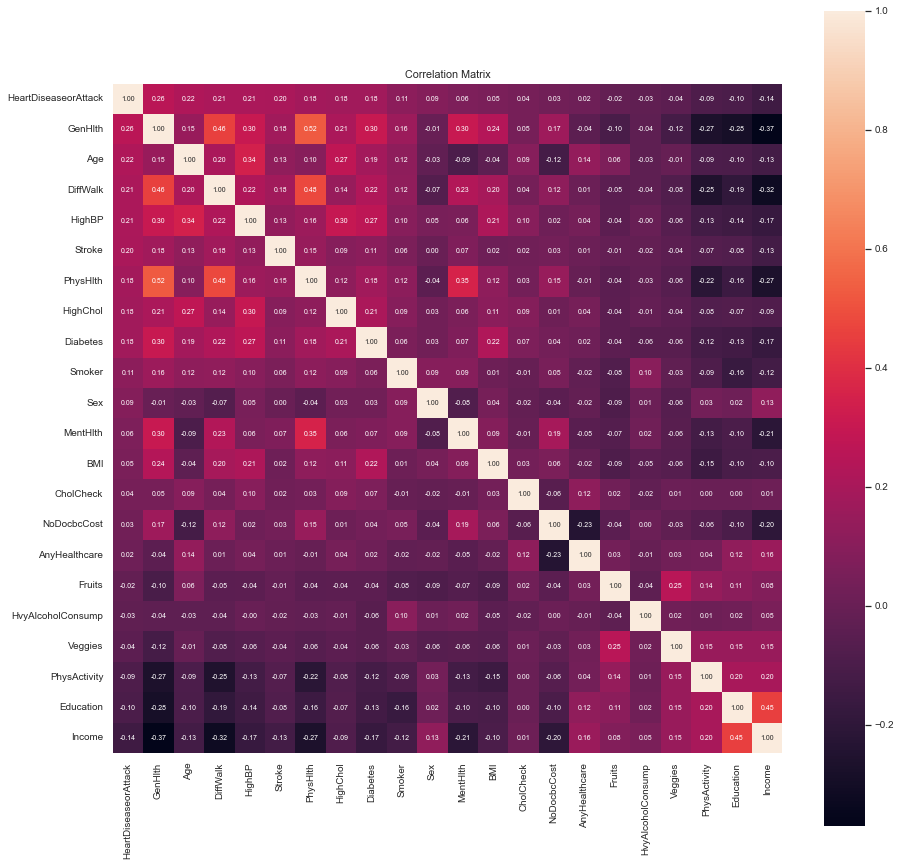

In [160]:
correlation_matrix = data.corr()
k = 22 # number of columns
columns_ = correlation_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
correlation_matrix = np.corrcoef(data[columns_].values.T)
sns.set(font_scale=.9)
fig, ax = plt.subplots(figsize=(15,15))  
heatmap = sns.heatmap(correlation_matrix,xticklabels=columns_.values, yticklabels=columns_.values, annot_kws={'size': 7},  annot=True, cbar=True, ax=ax, square=True, fmt='.02f')
plt.title("Correlation Matrix")
plt.show()

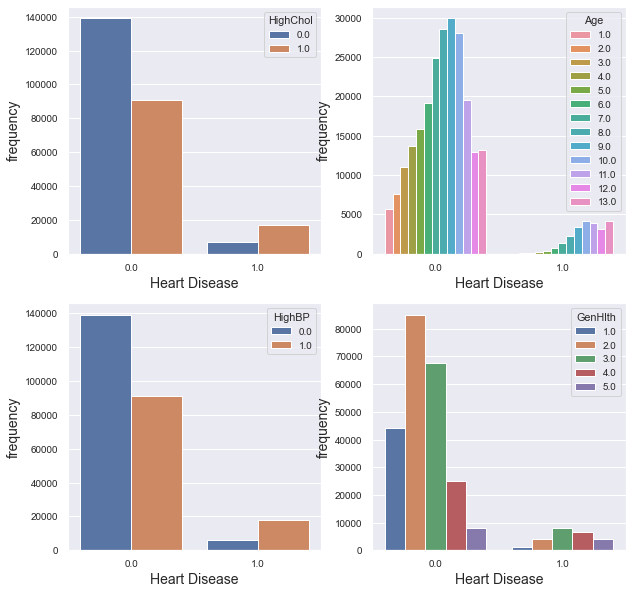

<Figure size 648x648 with 0 Axes>

In [161]:
figure,axs=plt.subplots(2,2,figsize=(10,10))
plt.figure(figsize=(9,9))
y_labels=['HighChol','Age','HighBP','GenHlth']
index=0
for i,j in zip([0,0,1,1],[0,1,0,1]):
    sns.countplot(x="HeartDiseaseorAttack",hue=y_labels[index],data=data, ax=axs[i][j])
    axs[i][j].set_xlabel("Heart Disease",fontsize=14)
    axs[i][j].set_ylabel("frequency",fontsize=14)
    index += 1
    
plt.show()

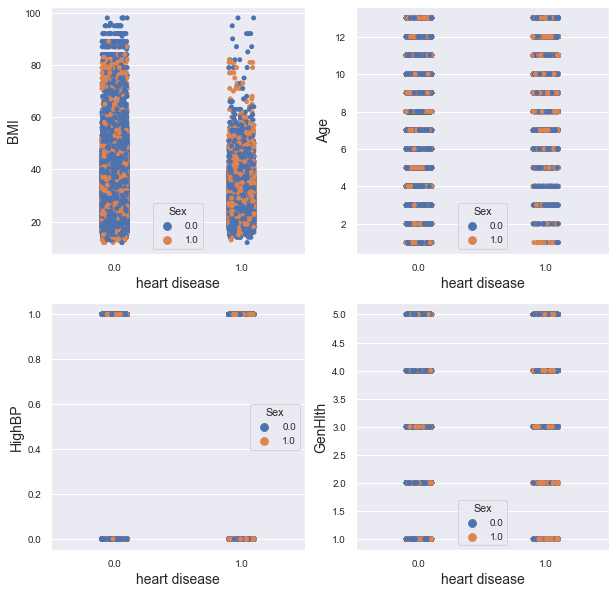

In [162]:
figure,axs=plt.subplots(2,2,figsize=(10,10))
y_labels=['BMI','Age','HighBP','GenHlth']
index=0
for i,j in zip([0,0,1,1],[0,1,0,1]):
    sns.stripplot(x="HeartDiseaseorAttack",y=y_labels[index],hue="Sex",data=data,ax=axs[i][j])
    axs[i][j].set_xlabel("heart disease",fontsize=14)
    axs[i][j].set_ylabel(y_labels[index],fontsize=14)
    index+=1
    

plt.show()

ValueError: Could not interpret input 'HeartDiseaseorAttack'

Text(0.5, 0, 'Heart Disease or Attack')

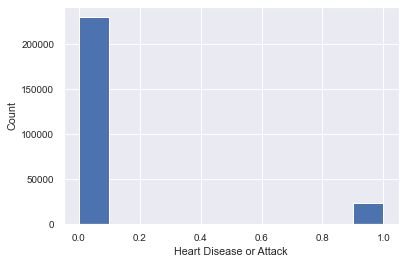

In [657]:
plt.hist(y) 
plt.ylabel('Count')
plt.xlabel('Heart Disease or Attack')

In [ ]:
sns.countplot(x="HeartDiseaseorAttack",hue=y_labels[index],data=data, ax=axs[i][j])

Part 2 - ML algorithms with imbalanced dataset

In [163]:
y = data['HeartDiseaseorAttack']
X = data.copy()
X = data.drop(columns = ['HeartDiseaseorAttack'])
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [164]:
# Standardization
for i in range(21):
    X.iloc[:,i] = (X.iloc[:,i]-np.mean(X.iloc[:,i]))/np.std(X.iloc[:,i])
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.425292,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.425292,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.425292,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


100%|███████████████████████████████████████████| 10/10 [00:10<00:00,  1.09s/it]


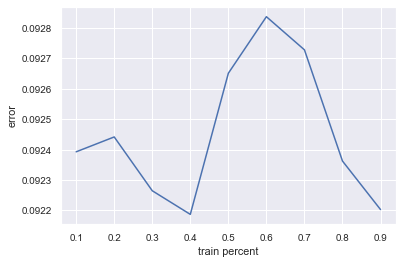

In [165]:
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')

lr_error_rate = []
trials = 10
train_percent = np.linspace(.1, .9, 9)

# For each training set percentage, create train/test split accordingly
# and run logistic regression 100 times and calculate the average error rate

"""
function input:
  X: data
  y: label
  ratio: train data percentage
  trails: number of trails to run

function return:
  the average error rate with this train data percentage
"""

def get_err_rate(X, y, ratio, trials):
    # todo:
    errs = []
    lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
    for trial in tqdm(np.arange(trials)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p)
        lr.fit(X_train, y_train)
        err = np.mean(lr.predict(X_test) != y_test)
        errs.append(err)
    return np.mean(errs)

# Use get_err_rate to find the error rate for respective split size
for p in train_percent:
    lr_error_rate.append(get_err_rate(X, y, p, trials))


plt.plot(train_percent, lr_error_rate)
plt.xlabel('train percent')
plt.ylabel('error')
plt.show()

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
lr.fit(X_train, y_train) 
# tree parameters go inside the first set of parentheses and the
# training data goes in the second set of parenthases. Check the 
# documentation for details.

LogisticRegression(C=0.1, multi_class='multinomial')

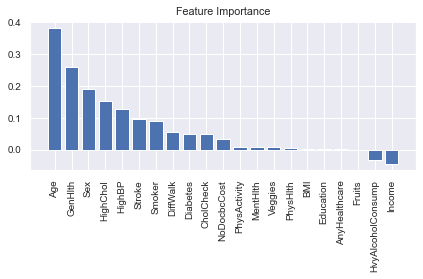

In [167]:
importances = lr.coef_[0]
sorted_indices = np.argsort(importances)[::-1]
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(X.columns)[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [168]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45910
         1.0       0.54      0.13      0.21      4826

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
regr = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
regr.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5, random_state=0)

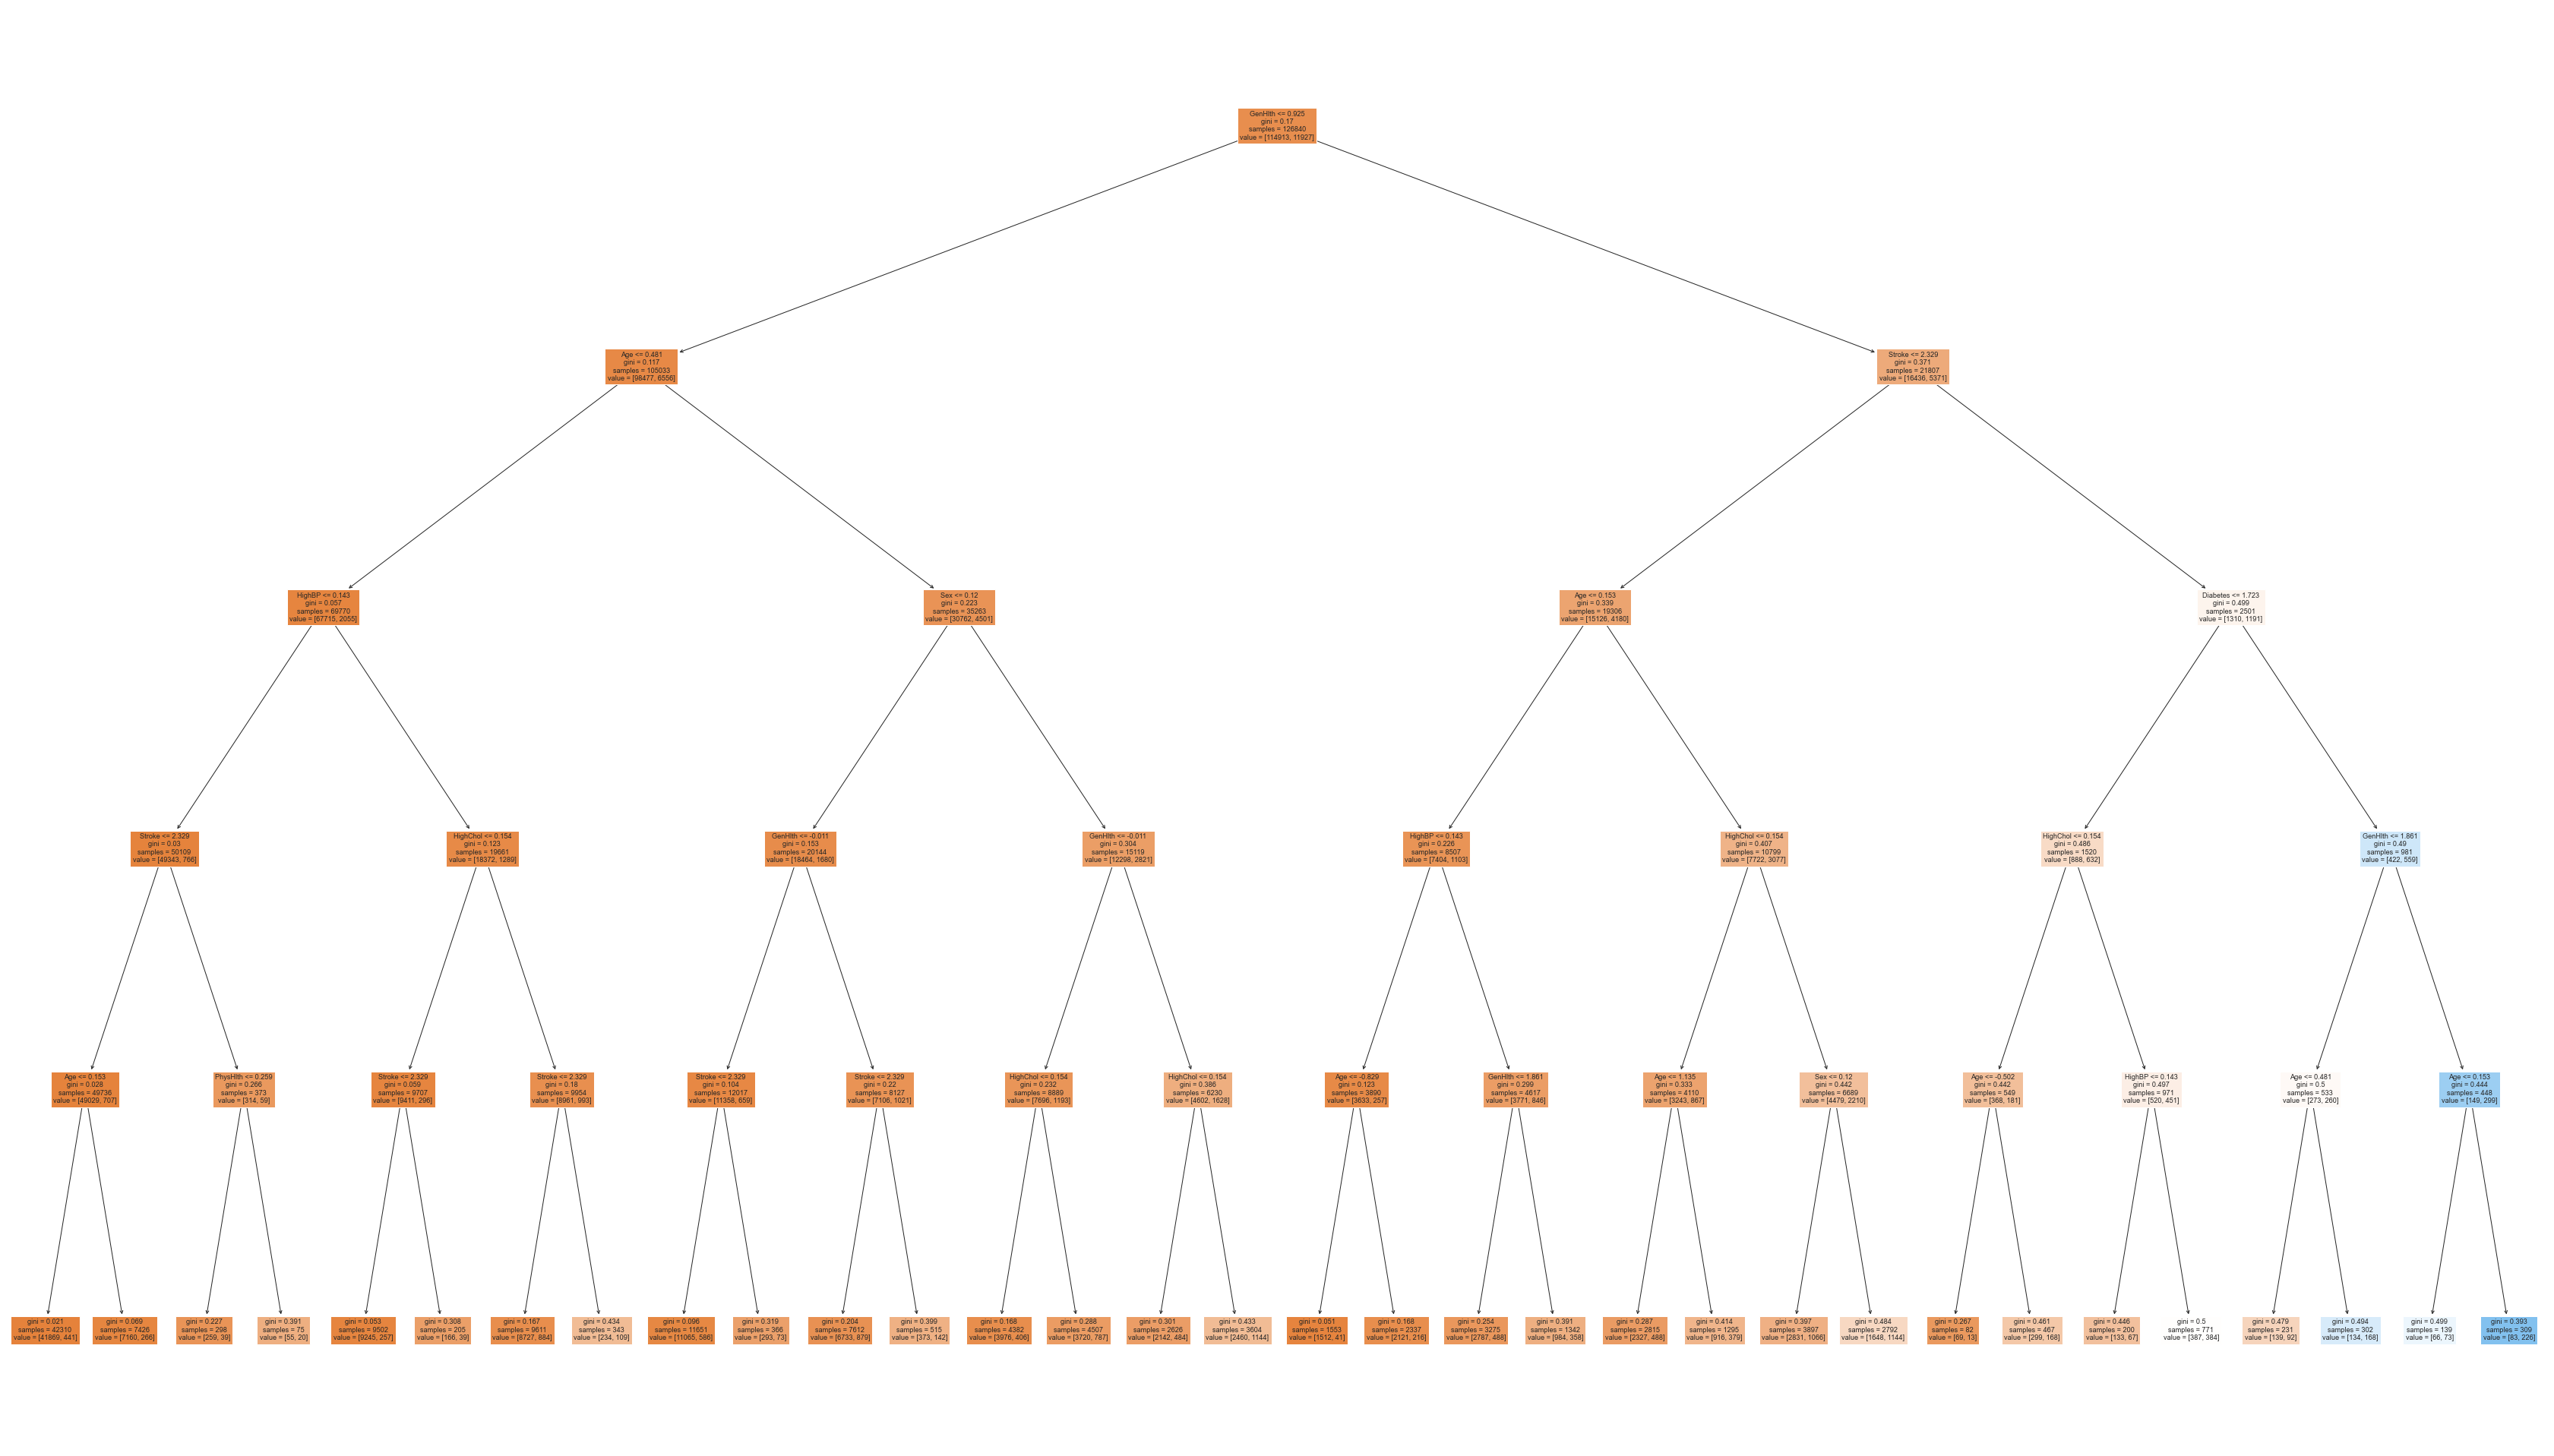

In [170]:
fig = plt.figure(figsize=(60,35))
_ = tree.plot_tree(regr, filled=True, feature_names=X.columns)

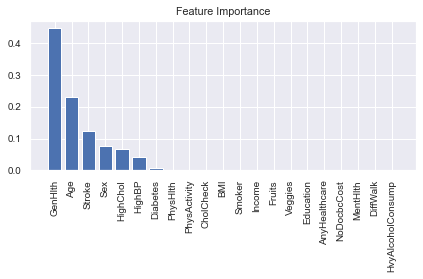

In [171]:
importances = regr.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(X.columns)[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [172]:
print(classification_report(y_test, regr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    114874
         1.0       0.61      0.04      0.08     11966

    accuracy                           0.91    126840
   macro avg       0.76      0.52      0.51    126840
weighted avg       0.88      0.91      0.87    126840



In [173]:
dtr = ensemble.RandomForestClassifier(min_samples_leaf=15, max_features=7)
regr = dtr.fit(X_train, y_train)
pred_y = regr.predict(X_test)
mse = np.mean(np.square(y_test-pred_y))

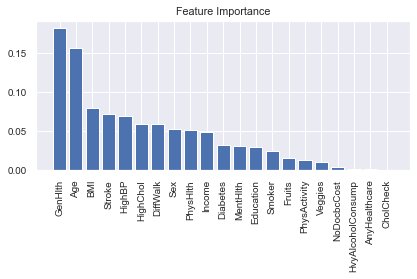

In [174]:
importances = regr.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(X.columns)[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [175]:
print(classification_report(y_test, dtr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    114874
         1.0       0.59      0.07      0.12     11966

    accuracy                           0.91    126840
   macro avg       0.75      0.53      0.54    126840
weighted avg       0.88      0.91      0.87    126840



Part 3 - Pytorch for an imbalanced dataset

In [186]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [207]:
## first method 
s= SMOTE()
##second method
smt= SMOTETomek()
##Third method
tk= TomekLinks()
X_res, y_res= s.fit_resample(X_train, y_train)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [217]:
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
lr.fit(X_res, y_res) 

LogisticRegression(C=0.1, multi_class='multinomial')

In [213]:
y_pred = lr.predict(X_res) 

In [218]:
print(classification_report(y_res, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77    160851
         1.0       0.76      0.81      0.78    160851

    accuracy                           0.78    321702
   macro avg       0.78      0.78      0.78    321702
weighted avg       0.78      0.78      0.78    321702



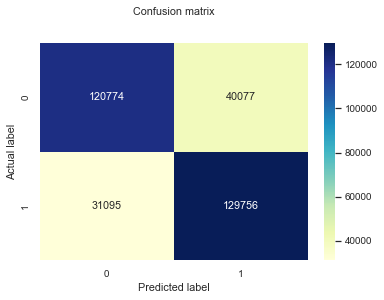

In [220]:
confusion_matrix(y_res, y_pred)

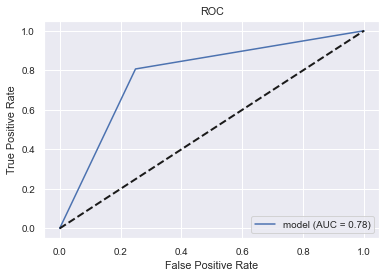

In [221]:
roc_plot(y_res, y_pred)

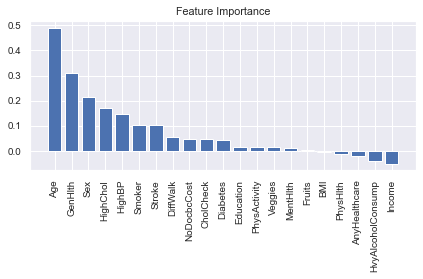

In [227]:
importances = lr.coef_[0]
sorted_indices = np.argsort(importances)[::-1]
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(X.columns)[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [570]:
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
lr.fit(X_res, y_res) 

LogisticRegression(C=0.1, multi_class='multinomial')

In [571]:
print(classification_report(y_res, lr.predict(X_res)))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76    160851
         1.0       0.75      0.79      0.77    160851

    accuracy                           0.77    321702
   macro avg       0.77      0.77      0.76    321702
weighted avg       0.77      0.77      0.76    321702



In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
regr = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
regr.fit(X_res, y_res) 

DecisionTreeClassifier(max_depth=5, random_state=0)

In [230]:
print(classification_report(y_res, regr.predict(X_res)))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81    160851
         1.0       0.81      0.80      0.81    160851

    accuracy                           0.81    321702
   macro avg       0.81      0.81      0.81    321702
weighted avg       0.81      0.81      0.81    321702



In [248]:
X_res

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,0.093458,1.120927,-0.205637,-0.425292,0.567275,-1.316872,-2.074316,...,0.226863,-0.303173,-1.414532,-0.429630,-0.486592,-0.449718,1.127369,0.644317,0.963272,0.939638
1,-0.866785,-0.858182,0.196922,-0.511806,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662
2,1.153688,-0.858182,0.196922,1.303987,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,0.457294,-0.159827,-0.486592,-0.449718,-0.887021,-2.302431,-0.051162,-0.508837
3,-0.866785,-0.858182,0.196922,1.455303,-0.892119,-0.205637,-0.425292,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,1.393207,0.244876,0.660468,-0.449718,-0.887021,-0.992766,0.963272,0.939638
4,1.153688,1.165254,0.196922,1.001355,-0.892119,-0.205637,2.439387,0.567275,-1.316872,-2.074316,...,0.226863,-0.303173,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,1.299149,-1.065595,-0.991662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321697,1.153688,-0.858182,0.196922,0.971691,-0.892119,-0.205637,-0.425292,0.567275,-1.316872,-2.074316,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.087385,0.963272,0.650899
321698,1.153688,1.165254,0.196922,-0.454922,1.120927,-0.205637,-0.425292,0.567275,-1.316872,0.482087,...,0.226863,-0.303173,0.281377,-0.378917,-0.465032,-0.449718,-0.887021,0.582774,0.963272,0.939638
321699,1.153688,1.165254,0.196922,-0.344685,1.120927,4.862949,-0.425292,0.567275,-1.316872,-2.074316,...,0.226863,-0.303173,0.555052,-0.429630,-0.366780,2.223615,-0.887021,1.299149,-0.157121,-2.007744
321700,0.941886,-0.858182,0.196922,-0.742433,-0.892119,-0.205637,-0.425292,0.567275,-1.316872,0.482087,...,0.226863,3.298445,1.196987,2.801486,0.382958,-0.449718,0.916204,-2.302431,0.055180,0.838411


In [278]:
X_ = X.loc[:, ['HighChol', 'GenHlth', 'Age', 'HighBP', 'Smoker', 'Stroke', 'Sex']]
X_

,HighChol,GenHlth,Age,HighBP,Smoker,Stroke,Sex
0,1.165254,2.329121,0.316900,1.153688,1.120927,-0.205637,-0.887021
1,-0.858182,0.457294,-0.337933,-0.866785,1.120927,-0.205637,-0.887021
2,1.165254,2.329121,0.316900,1.153688,-0.892119,-0.205637,-0.887021
3,-0.858182,-0.478619,0.971733,1.153688,-0.892119,-0.205637,-0.887021
4,1.165254,-0.478619,0.971733,1.153688,-0.892119,-0.205637,-0.887021
...,...,...,...,...,...,...,...
253675,1.165254,0.457294,-0.992766,1.153688,-0.892119,-0.205637,1.127369
253676,1.165254,1.393207,0.971733,1.153688,-0.892119,-0.205637,-0.887021
253677,-0.858182,-1.414532,-1.975015,-0.866785,-0.892119,-0.205637,-0.887021
253678,-0.858182,0.457294,-0.337933,1.153688,-0.892119,-0.205637,1.127369


In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_,
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [281]:
s= SMOTE()
X_res, y_res= s.fit_resample(X_train, y_train)

In [282]:
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
lr.fit(X_res, y_res) 

LogisticRegression(C=0.1, multi_class='multinomial')

In [572]:
print(classification_report(y_res, lr.predict(X_res)))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76    160851
         1.0       0.75      0.79      0.77    160851

    accuracy                           0.77    321702
   macro avg       0.77      0.77      0.76    321702
weighted avg       0.77      0.77      0.76    321702



In [587]:
dtr = ensemble.RandomForestClassifier(min_samples_leaf=15, max_features=7)
rf = dtr.fit(X_res, y_res)

In [588]:
print(classification_report(y_res, dtr.predict(X_res)))

              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77    160851
         1.0       0.75      0.84      0.80    160851

    accuracy                           0.78    321702
   macro avg       0.79      0.78      0.78    321702
weighted avg       0.79      0.78      0.78    321702



In [649]:
smoke = []
gender = []
stroke = []
bp_ = []
highcol_ = []
genhtlh_ = []
age = []

if input('Are you a smoker?') == 'Yes':
    smoke.append(list(set(X_['Smoker']))[1])
else:
    smoke.append(list(set(X_['Smoker']))[0])

if input('Are you Male or Female') == 'Male':
    gender.append(list(set(X_['Smoker']))[1])
else:
    gender.append(list(set(X_['Smoker']))[0])

if input('Have you ever had a stroke') == 'Yes':
    stroke.append(list(set(X_['Smoker']))[1])
else:
    stroke.append(list(set(X_['Smoker']))[0])
    
if input('Do you have a high blood pressure?') == 'Yes':
    bp_.append(list(set(X_['Smoker']))[1])
else:
    bp_.append(list(set(X_['Smoker']))[0])
    
if input('Do you have a high cholesterol?') == 'Yes':
    highcol_.append(list(set(X_['Smoker']))[1])
else:
    highcol_.append(list(set(X_['Smoker']))[0])
    
r = input('From a scale from 1 to 5, how do you consider your general health (where 5 is the highest)?')

if r == '1':
    genhtlh_.append(list(set(X_['GenHlth']))[2])
elif r == '2':
    genhtlh_.append(list(set(X_['GenHlth']))[1])
elif r == '3':
    genhtlh_.append(list(set(X_['GenHlth']))[0])
elif r == '4':
    genhtlh_.append(list(set(X_['GenHlth']))[3])
elif r == '5':
    genhtlh_.append(list(set(X_['GenHlth']))[4])
    

a_ = input('How old are you?')

if int(a_) < 8:
    age.append(min(list(set(X_['Age']))))

elif 8<= int(a_) < 16:
    age.append(list(set(X_['Age']))[8])
    
elif 8<= int(a_) < 16:
    age.append(list(set(X_['Age']))[4])
    
elif 16<= int(a_) < 34:
    age.append(list(set(X_['Age']))[10])
    
elif 34<= int(a_) < 42:
    age.append(list(set(X_['Age']))[12])
    
elif 42<= int(a_) < 50:
    age.append(list(set(X_['Age']))[7])

elif 50<= int(a_) < 58:
    age.append(list(set(X_['Age']))[5])
    
elif 58<= int(a_) < 66:
    age.append(list(set(X_['Age']))[1])
    
elif 66<= int(a_) < 74:
    age.append(list(set(X_['Age']))[9])

elif 74<= int(a_) < 82:
    age.append(list(set(X_['Age']))[0])

elif 82<= int(a_) < 90:
    age.append(list(set(X_['Age']))[3])
    
elif 90<= int(a_) < 98:
    age.append(list(set(X_['Age']))[6])

elif 98<= int(a_):
    age.append(list(set(X_['Age']))[4])

Are you a smoker?No
Are you Male or FemaleMale
Have you ever had a strokeNo
Do you have a high blood pressure?Yes
Do you have a high cholesterol?No
From a scale from 1 to 5, how do you consider your general health (where 5 is the highest)?1
How old are you?35


In [650]:
input_data = pd.DataFrame({
    'Smoker':smoke, 
    'Sex': gender,
    'Stroke': stroke,
    'HighBP': bp_,
    'HighChol': highcol_,
    'GenHlth': genhtlh_,
    'Age': age
    
})
input_data

,Smoker,Sex,Stroke,HighBP,HighChol,GenHlth,Age
0,-0.892119,1.120927,-0.892119,1.120927,-0.892119,2.329121,-1.320182


In [651]:
new_input = input_data
new_output = lr.predict(new_input)
new_output_2 = regr.predict(new_input)
new_output_3 = dtr.predict(new_input)
result = (new_output + new_output_2 + new_output_3)/3
result

array([0.66666667])

In [652]:
result[0]

0.6666666666666666

In [622]:
result = []

In [623]:
result[0]

IndexError: list index out of range